In [124]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [125]:
!pip install imblearn
!pip install mlxtend
!pip install yellowbrick

In [126]:
import os
import six
import sys
import pickle
import pickle
import imblearn
import pandas as pd
import seaborn as sns
import numpy as np
import plotly.express as px
from sklearn import ensemble
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn import preprocessing
import plotly.figure_factory as ff
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import StackingClassifier
from mlxtend.classifier import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.feature_selection import mutual_info_classif, SelectFromModel, SelectPercentile
import warnings
warnings.filterwarnings('ignore')

# Data Loading

In [127]:
df = pd.read_csv("/content/drive/MyDrive/heart_disease_classification/Data/heart_disease_uci.csv")
df.head()

id  age     sex    dataset               cp  trestbps   chol    fbs  \
0   1   63    Male  Cleveland   typical angina     145.0  233.0   True   
1   2   67    Male  Cleveland     asymptomatic     160.0  286.0  False   
2   3   67    Male  Cleveland     asymptomatic     120.0  229.0  False   
3   4   37    Male  Cleveland      non-anginal     130.0  250.0  False   
4   5   41  Female  Cleveland  atypical angina     130.0  204.0  False   

          restecg  thalch  exang  oldpeak        slope   ca  \
0  lv hypertrophy   150.0  False      2.3  downsloping  0.0   
1  lv hypertrophy   108.0   True      1.5         flat  3.0   
2  lv hypertrophy   129.0   True      2.6         flat  2.0   
3          normal   187.0  False      3.5  downsloping  0.0   
4  lv hypertrophy   172.0  False      1.4    upsloping  0.0   

                thal  num  
0       fixed defect    0  
1             normal    2  
2  reversable defect    1  
3             normal    0  
4             normal    0

In [128]:
df.describe()

id         age    trestbps        chol      thalch     oldpeak  \
count  920.000000  920.000000  861.000000  890.000000  865.000000  858.000000   
mean   460.500000   53.510870  132.132404  199.130337  137.545665    0.878788   
std    265.725422    9.424685   19.066070  110.780810   25.926276    1.091226   
min      1.000000   28.000000    0.000000    0.000000   60.000000   -2.600000   
25%    230.750000   47.000000  120.000000  175.000000  120.000000    0.000000   
50%    460.500000   54.000000  130.000000  223.000000  140.000000    0.500000   
75%    690.250000   60.000000  140.000000  268.000000  157.000000    1.500000   
max    920.000000   77.000000  200.000000  603.000000  202.000000    6.200000   

               ca         num  
count  309.000000  920.000000  
mean     0.676375    0.995652  
std      0.935653    1.142693  
min      0.000000    0.000000  
25%      0.000000    0.000000  
50%      0.000000    1.000000  
75%      1.000000    2.000000  
max      3.000000    4.000000

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


# Data Cleaning

In [130]:
df.dropna(inplace=True)

In [131]:
df.isna().sum()

id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [132]:
df.shape

(299, 16)

In [133]:
df.columns

Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

In [134]:
df.drop(['id','dataset'],axis='columns',inplace=True)

In [135]:
df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

In [136]:
#converting multiclass data into binary class (due to imbalanced dataset)
df.target.replace({2:1,3:1,4:1},inplace=True)

# Data Visualization

In [137]:
fig = px.box(df, x="age" , title="age Distribution")
fig.show()

In [140]:
tempdf = df['target'].value_counts().reset_index()
tempdf
fig = px.pie(tempdf, values='count', names='target',title='the predicted attribute')
fig.show()

In [141]:
fig = px.histogram(df, y="thalch", title='thalch value distribution', color_discrete_sequence=['indianred'])
fig.show()

In [142]:
tempdf = df[['cp', 'thalch']].groupby(['cp']).mean()
tempdf = tempdf.reset_index()
fig = px.bar(tempdf, x='cp', y='thalch', color='cp', title="thalch wise chest pain type")
fig.show()

In [150]:
tempdf = df['ca'].value_counts().reset_index()
fig = px.line(tempdf, y='count', x='ca',title='value count of ca')
fig.show()

In [144]:
tempdf = df[['restecg', 'trestbps']].groupby(['restecg']).mean()
tempdf = tempdf.reset_index()
fig = px.pie(tempdf, names='restecg', values='trestbps', color='restecg', title='resting electrocardiographic wise average resting blood pressure')
fig.show()

In [145]:
tempdf = df[['sex', 'chol']].groupby(['sex']).mean()
tempdf = tempdf.reset_index()
fig = px.bar(tempdf, x='sex', y='chol', color='sex', title='gender wise average cholesterol')
fig.show()

In [151]:
tempdf = df[['age', 'thalch']].groupby(['age']).mean()
tempdf = tempdf.reset_index()
fig = px.line(tempdf, x='age', y='thalch', color_discrete_sequence=['green'], title="age wise average thalch")
fig.show()

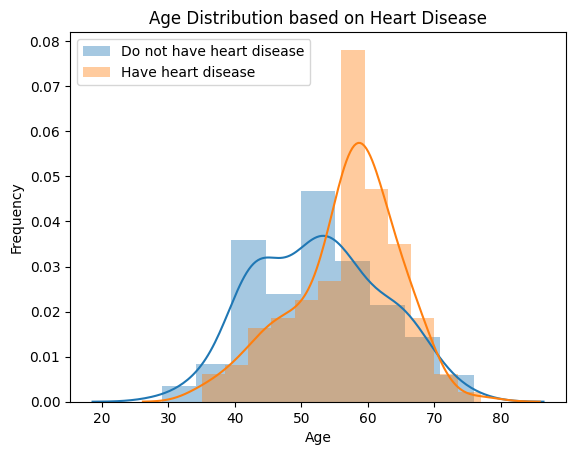

In [152]:
# Display age distribution based on heart disease
sns.distplot(df[df['target'] == 0]['age'], label='Do not have heart disease')
sns.distplot(df[df['target'] == 1]['age'], label = 'Have heart disease')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution based on Heart Disease')
plt.legend()
plt.show()

# Data Preprocessing

In [153]:
col = df.select_dtypes(exclude=['float64','int64']).columns.tolist()
col

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']

In [154]:
#label encoding(converting categorical data to number)
le = LabelEncoder()
df[col] = df[col].apply(le.fit_transform)
filename = '/content/drive/MyDrive/heart_disease_classification/label_encoder.pkl'
le = LabelEncoder()
pickle.dump(le, open(filename, 'wb'))

In [155]:
df.head()

age  sex  cp  trestbps   chol  fbs  restecg  thalch  exang  oldpeak  slope  \
0   63    1   3     145.0  233.0    1        0   150.0      0      2.3      0   
1   67    1   0     160.0  286.0    0        0   108.0      1      1.5      1   
2   67    1   0     120.0  229.0    0        0   129.0      1      2.6      1   
3   37    1   2     130.0  250.0    0        1   187.0      0      3.5      0   
4   41    0   1     130.0  204.0    0        0   172.0      0      1.4      2   

    ca  thal  target  
0  0.0     0       0  
1  3.0     1       1  
2  2.0     2       1  
3  0.0     1       0  
4  0.0     1       0

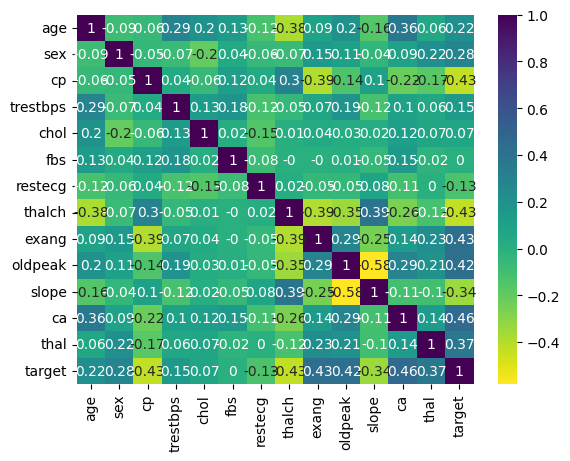

In [156]:
#correlation matrix
correlation = df.corr().round(2)
sns.heatmap(correlation, annot = True, cmap = 'viridis_r')
plt.show()

In [157]:
X = df.drop('target',axis=1)
y = df.target

In [158]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1, stratify=y, random_state=10)

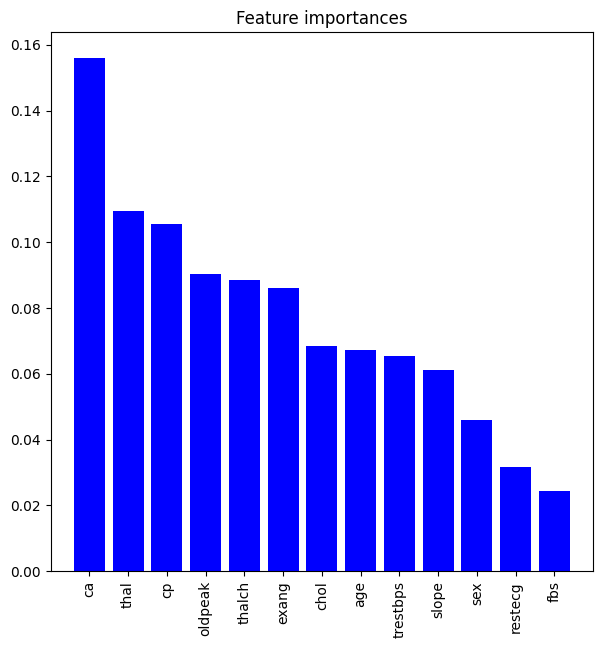

In [159]:
#model feature importance(finding impact of feature variable on target)
fearture_name = X_train.columns.values
model = ensemble.ExtraTreesRegressor(n_estimators=25, max_depth=30, max_features=0.3, n_jobs=-1, random_state=0)
model.fit(X_train,y_train)
#plot imp
importance = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_],axis=0)
indices = np.argsort(importance)[::-1][:]
plt.figure(figsize=(7,7))
plt.title("Feature importances")
plt.bar(range(len(indices)), importance[indices], color="b")
plt.xticks(range(len(indices)), fearture_name[indices], rotation='vertical')
plt.xlim([-1, len(indices)])
plt.show()

# ML Models

AdaBoost Classifier

In [160]:
adb_model = AdaBoostClassifier()
adbclf = adb_model
adbclf.fit(X_train,y_train)
y_pred = adbclf.predict(X_test)

In [161]:
#accuracy score
print("Accuracy Score: ",accuracy_score(y_test,y_pred))

Accuracy Score:  0.8333333333333334


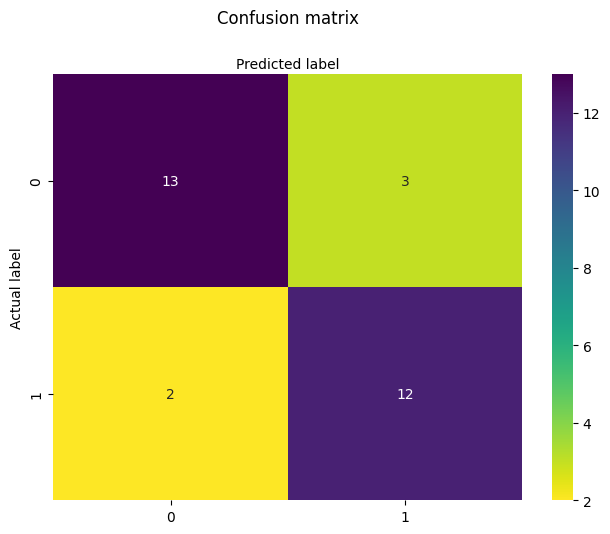

In [162]:
#confusion Matrix
matrix =confusion_matrix(y_test, y_pred)
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(matrix), annot=True, cmap="viridis_r" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [163]:

#Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.81      0.84        16
           1       0.80      0.86      0.83        14

    accuracy                           0.83        30
   macro avg       0.83      0.83      0.83        30
weighted avg       0.84      0.83      0.83        30



In [164]:
#sensitivity and specificity
res = []
for l in range(2):
    prec,recall,_,_ = precision_recall_fscore_support(y_test==l,
    y_pred==l,
    pos_label=True,average=None)
    res.append([l,recall[0],recall[1]])
pd.DataFrame(res,columns = ['class','sensitivity','specificity'])


class  sensitivity  specificity
0      0     0.857143     0.812500
1      1     0.812500     0.857143

DecisionTreeClassifier

In [165]:
#DecisionTreeClassifier
dtc_model = DecisionTreeClassifier(max_depth=2)
dtc = dtc_model
dtc.fit(X_train,y_train)
y_pred = dtc.predict(X_test)

In [166]:
#accuracy score
print("Accuracy Score: ",accuracy_score(y_test,y_pred))

Accuracy Score:  0.8333333333333334


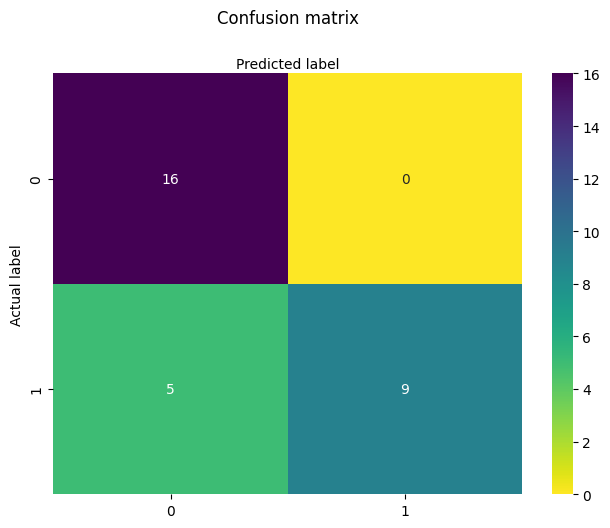

In [167]:
#confusion Matrix
matrix =confusion_matrix(y_test, y_pred)
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(matrix), annot=True, cmap="viridis_r" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [168]:
#Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      1.00      0.86        16
           1       1.00      0.64      0.78        14

    accuracy                           0.83        30
   macro avg       0.88      0.82      0.82        30
weighted avg       0.87      0.83      0.83        30



In [169]:
#sensitivity and specificity
res = []
for l in range(2):
    prec,recall,_,_ = precision_recall_fscore_support(y_test==l,
    y_pred==l,
    pos_label=True,average=None)
    res.append([l,recall[0],recall[1]])
pd.DataFrame(res,columns = ['class','sensitivity','specificity'])


class  sensitivity  specificity
0      0     0.642857     1.000000
1      1     1.000000     0.642857

RandomForest Classifier

In [170]:
#RandomForest Classifier
rf_clf = RandomForestClassifier(n_estimators=2, criterion='gini', max_depth=1)
rf = rf_clf
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)

In [171]:
#accuracy score
print("Accuracy Score: ",accuracy_score(y_test,y_pred))

Accuracy Score:  0.8333333333333334


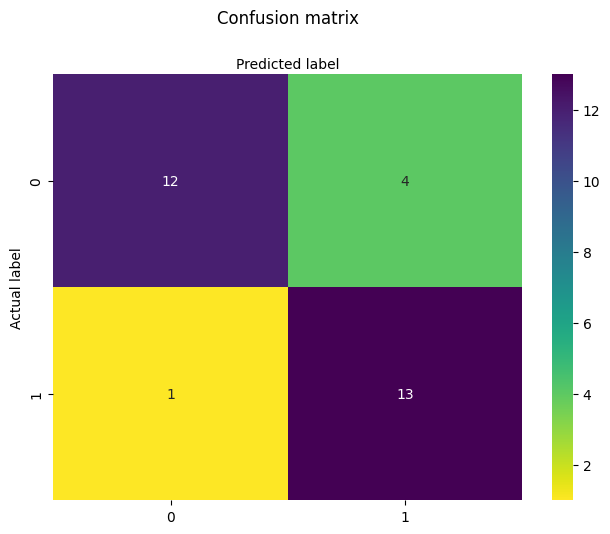

In [172]:
#confusion Matrix
matrix =confusion_matrix(y_test, y_pred)
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(matrix), annot=True, cmap="viridis_r" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [173]:
#Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.75      0.83        16
           1       0.76      0.93      0.84        14

    accuracy                           0.83        30
   macro avg       0.84      0.84      0.83        30
weighted avg       0.85      0.83      0.83        30



In [174]:
#sensitivity and specificity
res = []
for l in range(2):
    prec,recall,_,_ = precision_recall_fscore_support(y_test==l,
    y_pred==l,
    pos_label=True,average=None)
    res.append([l,recall[0],recall[1]])
pd.DataFrame(res,columns = ['class','sensitivity','specificity'])


class  sensitivity  specificity
0      0     0.928571     0.750000
1      1     0.750000     0.928571

Stacking Classifier

In [175]:
#Stacking classifier
clf = StackingClassifier(classifiers = [RandomForestClassifier(),AdaBoostClassifier()], meta_classifier=DecisionTreeClassifier())
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [176]:
#accuracy score
print("Accuracy Score: ",accuracy_score(y_test,y_pred))

Accuracy Score:  0.9333333333333333


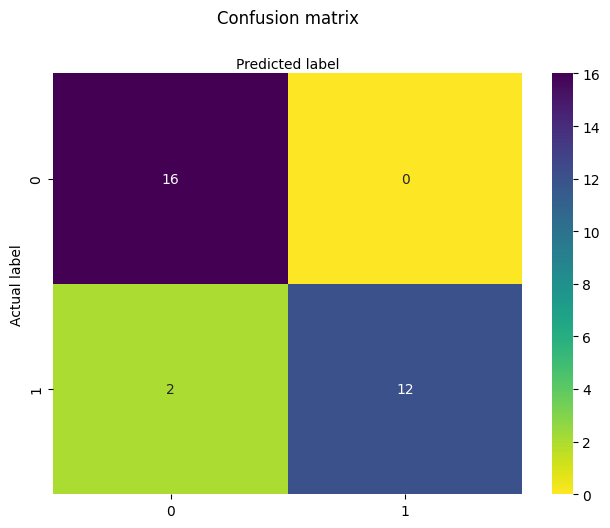

In [177]:
#confusion Matrix
matrix =confusion_matrix(y_test, y_pred)
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(matrix), annot=True, cmap="viridis_r" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [178]:
#Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94        16
           1       1.00      0.86      0.92        14

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30



In [179]:
#sensitivity and specificity
res = []
for l in range(2):
    prec,recall,_,_ = precision_recall_fscore_support(y_test==l,
    y_pred==l,
    pos_label=True,average=None)
    res.append([l,recall[0],recall[1]])
pd.DataFrame(res,columns = ['class','sensitivity','specificity'])


class  sensitivity  specificity
0      0     0.857143     1.000000
1      1     1.000000     0.857143

In [180]:
filename = '/content/drive/MyDrive/heart_disease_classification/stackingclassifier.sav'
pickle.dump(clf, open(filename, 'wb'))